In [1]:
%load_ext autoreload
%autoreload 2 
%reload_ext autoreload
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import scipy.io as io
from pyDOE import lhs
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

from complexPyTorch.complexLayers import ComplexLinear

import cplxmodule
from cplxmodule import cplx
from cplxmodule.nn import RealToCplx, CplxToReal, CplxSequential, CplxToCplx
from cplxmodule.nn import CplxLinear, CplxModReLU, CplxAdaptiveModReLU, CplxModulus, CplxAngle

# To access the contents of the parent dir
import sys; sys.path.insert(0, '../')
import os
from scipy.io import loadmat
from utils import *
from models import (TorchComplexMLP, ImaginaryDimensionAdder, cplx2tensor, 
                    ComplexTorchMLP, ComplexSymPyModule, complex_mse)
from preprocess import *

# Model selection
from sparsereg.model import STRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from pde_diff import TrainSTRidge, FiniteDiff, print_pde
from RegscorePy.bic import bic

from madgrad import MADGRAD

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import sympy, torch, sympytorch
x1 = sympy.symbols('x1_name')
x2 = sympy.symbols('x2_name')

In [3]:
cn1 = torch.complex(torch.rand(1), torch.rand(1))
cn2 = torch.complex(torch.rand(1), torch.rand(1))
X_train = torch.complex(torch.rand(1000, 2), torch.rand(1000, 2))
y_train = cn1*X_train[:, 0:1]+cn2*X_train[:, 1:2]

In [4]:
model = ComplexSymPyModule(expressions=[x1, x2])
optimizer = MADGRAD(model.parameters(), lr=1e-3)

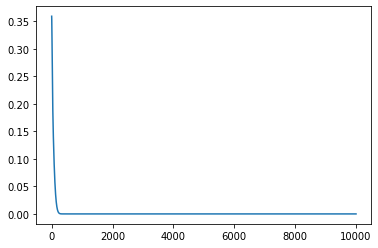

In [5]:
hist = []
for _ in range(10000):
    optimizer.zero_grad()
    preds = model({'x1_name': X_train[:, 0:1], 'x2_name': X_train[:, 1:2]})
    loss = complex_mse(preds, y_train)
    loss.backward()
    optimizer.step()
    hist.append(loss.item())
import matplotlib.pyplot as plt
plt.plot(hist); plt.show()

In [6]:
model.eval()
preds = model({'x1_name': X_train[:, 0:1], 'x2_name': X_train[:, 1:2]})
complex_mse(preds, y_train)

tensor(8.6944e-15, grad_fn=<AddBackward0>)

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([[0.0993],
         [0.8748]], requires_grad=True),
 Parameter containing:
 tensor([[0.6763],
         [0.4553]], requires_grad=True)]